# The following notebook has been developed to apply and understand K means clustering algorithm. The wine quality dataset is imported as usual and and clustering is performed on the same. Now, to know how many clusters there should be and to find out the optimal solution for it we apply elbow graph technique which is another great method to find optimal cluster number.  

### Importing the dataset first and then the Kmeans clustering function from the sklearn library. It begins with keeping number of clusters=3 and has a maximum iteration limit of 300. This means that after 300 iterations the clustering process stops.It uses the 1st and 11th column signified by [0,10] as prime attributes for the clustering task.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/shriansh/Downloads/winequality_red.csv', header=None)
X = df.iloc[1:500, [0,10]].values
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

### Scatter plot to observe the clusters formed. The star mark signifies the centroids of each cluster.

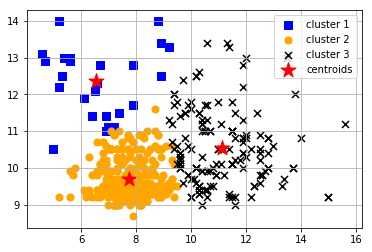

In [4]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50, c='blue',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='black',marker='x',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

### Similar plot as above, it just does not contain the clusters and centroids. This is done just to observe the data distribution.

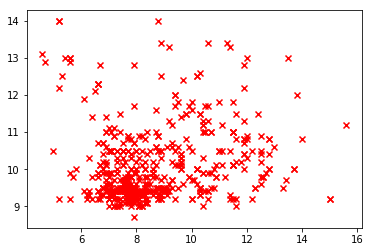

In [5]:
plt.scatter(X[:,0],X[:,1],c='red',marker='x')
plt.show()

### Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. A good positive silhoutte value > 0.5 indicates that the clustering performed is good and also tells that there is significant difference between different clusters. 

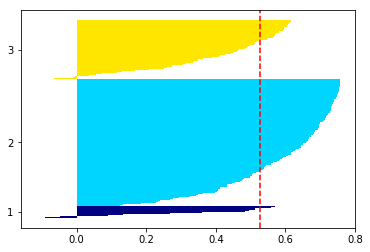

In [6]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
y_km,
metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
color="red",
linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.show()

### This is one of the age old methods of finding the optimal number of clusters. A graph of distortions v/s NUmber of clusters tells which value of 'K' should be chosen. The catch is that the value of 'K' at which the curve obtains an elbow edge shape is the optimal K value. This is because at this particular K value distortions have started to take a value which isnt varying much even when K is further increased. In this plot the values 3 and 4 can be such values. 

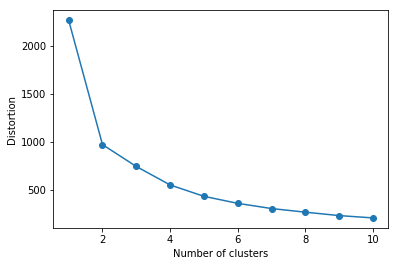

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Agglomerative clustering is another method for performing clustering on the dataset. It works by bottom up approach. Each data point is considered as a separate cluster first, later with each iteration these points begin to form cluster until the similarity criteria is met. In this manner clustering is achieved. In this code snippet we apply Agglomerative clustering with K=2. The beauty of Agglomerative clustering is that it is better, considered spiral shapes too and is resistant to noisy data.



In [15]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0]


### Spiral like data distribution which is to be clustered by Agglomerative clustering.

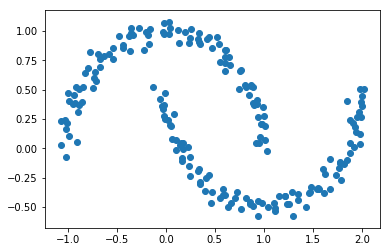

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
noise=0.05,
random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

### This code snippet deals with applying K means clustering and Agglomerative clustering on the above spiral like data distribution. The methods are applied and their clustering performance is observed as shown by 2 plots below.

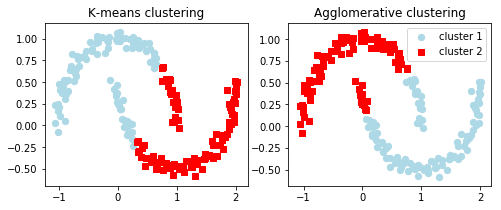

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,
random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
X[y_km==0,1],
c='lightblue',
marker='o',
s=40,
label='cluster 1')
ax1.scatter(X[y_km==1,0],
X[y_km==1,1],
c='red',
marker='s',
s=40,
label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
X[y_ac==0,1],
c='lightblue',
marker='o',
s=40,
label='cluster 1')
ax2.scatter(X[y_ac==1,0],
X[y_ac==1,1],
c='red',
marker='s',
s=40,
label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

### Finally, we apply yet another famous clustering approaches for our spiral data. This method is called Density-based spatial clustering of applications with noise (DBSCAN). It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). You can see how DBSCAN outperforms our Agglomertive and K means method in this spiral like data distribution case.

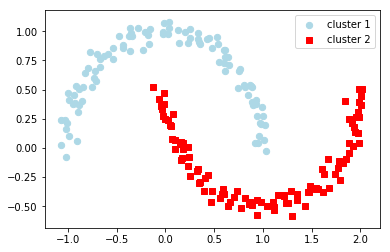

In [19]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
X[y_db==0,1],
c='lightblue',
marker='o',
s=40,
label='cluster 1')
plt.scatter(X[y_db==1,0],
X[y_db==1,1],
c='red',
marker='s',
s=40,
label='cluster 2')
plt.legend()
plt.show()